In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

## The Great Migration

DATASETS: 

migration.xlsx (source https://www.census.gov/dataviz/visualizations/020/508.php); 
uscities.xlsx ((https://simplemaps.com/data/us-cities))

SUMMARY: We create a heat map to show the %change in African Americans living in cities in the Northern and Southern USA as a result of the Great Migrations. Those with the largest increase (over 20%) were all in the North. 

BACKGROUND:  Isabel Wilkerson gives a good introduction to the Great Migration. (Run the next cell)

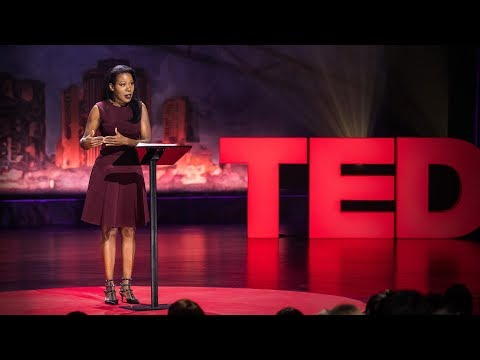

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('n3qA8DNc2Ss')

### Creating a Dataframe with %Changes in African American Population by (Lat,Lon) Location

1) Use pandas to import the datafile migration.xlsx into a dataframe called migration.

In [3]:
migration=pd.read_excel('migration.xlsx')

2) Display the first two rows of migration.

In [4]:
migration.head(2)

,City and State,Percentage-point change in Black population 1940-1970,Percentage-point change in Black population 1910-1940
0,"Aberdeen, SD",-0.5,0
1,"Abilene, TX",-0.8,0.1


3) Shorten the column names (MIg1=1st Great Migration, Mig2=2nd Great Migration),  separate the City and State, and create a multi-index with city and state.

In [5]:
migdf=migration #make a copy of the original dataframe
migdf.columns=["City","Mig2","Mig1"] #rename the columns
migdf["city"]="city"  #create a column for the city
migdf["state"]="state"  #create a column for the state
for m in migdf.index:
    x=migdf.loc[m,"City"].split(", ")  #split the city from the state
    migdf.loc[m,"city"]=x[0]  #add the city to the city column
    migdf.loc[m,"state"]=x[1]  #add the state to the state column
migdf.drop(['City'], axis=1, inplace=True) #Drop the original City column
migdf=migdf.set_index(["city","state"],drop=True) #create multi-index
migdf.head(5)

,,Mig2,Mig1
city,state,,
Aberdeen,SD,-0.5,0
Abilene,TX,-0.8,0.1
Akron,OH,4.1,12.5
Albany,NY,1.2,10
Albuquerque,NM,-0.7,0.7


4) Read the lat lon data for US cities in the file "uscities.xlsx" and make ["city","state"] the multi-index.

In [6]:
rawlatlon=pd.read_excel("uscities.xlsx") #read data
latlon=rawlatlon[["city_ascii","lat","lng","state_id"]] #select columns
latlon.columns=["city","lat","lon","state"] #rename columns
latlon=latlon.set_index(["city","state"],drop=True) #create multi-index
latlon.head(2)

,,lat,lon
city,state,,
South Creek,WA,46.9994,-122.3921
Roslyn,WA,47.2507,-121.0989


5) We'll perform an inner join (intersection) of the two dataframes migdf and latlon. This will add the lat lon data to the migdf data

In [7]:
df=pd.merge(latlon,migdf, how='inner', left_index=True,right_index=True)
df.columns=["lat","lon","Mig2","Mig1"]
df.to_excel("GM.xlsx")
df.head(5)

,,lat,lon,Mig2,Mig1
city,state,,,,
Seattle,WA,47.6211,-122.3244,0.1,6.1
Spokane,WA,47.6671,-117.4330,-0.2,0.7
Tacoma,WA,47.2431,-122.4531,-0.3,6.2
New Castle,DE,39.6685,-75.5692,-2,-3.2
Wilmington,DE,39.7415,-75.5413,2.3,31


6) Check for missing data.

In [8]:
df[df["Mig1"]=="No data"].count()

lat     6
lon     6
Mig2    6
Mig1    6
dtype: int64

In [9]:
df[df["Mig2"]=="No data"].count()

lat     14
lon     14
Mig2    14
Mig1    14
dtype: int64

7) Remove rows with missing data.

In [10]:
df.count()

lat     245
lon     245
Mig2    245
Mig1    245
dtype: int64

In [11]:
df=df[df["Mig1"]!="No data"]
df=df[df["Mig2"]!="No data"]
df.count()

lat     231
lon     231
Mig2    231
Mig1    231
dtype: int64

### Creating a Map from our Dataframe

8)  Make a heat map of the 1st Great Migration.

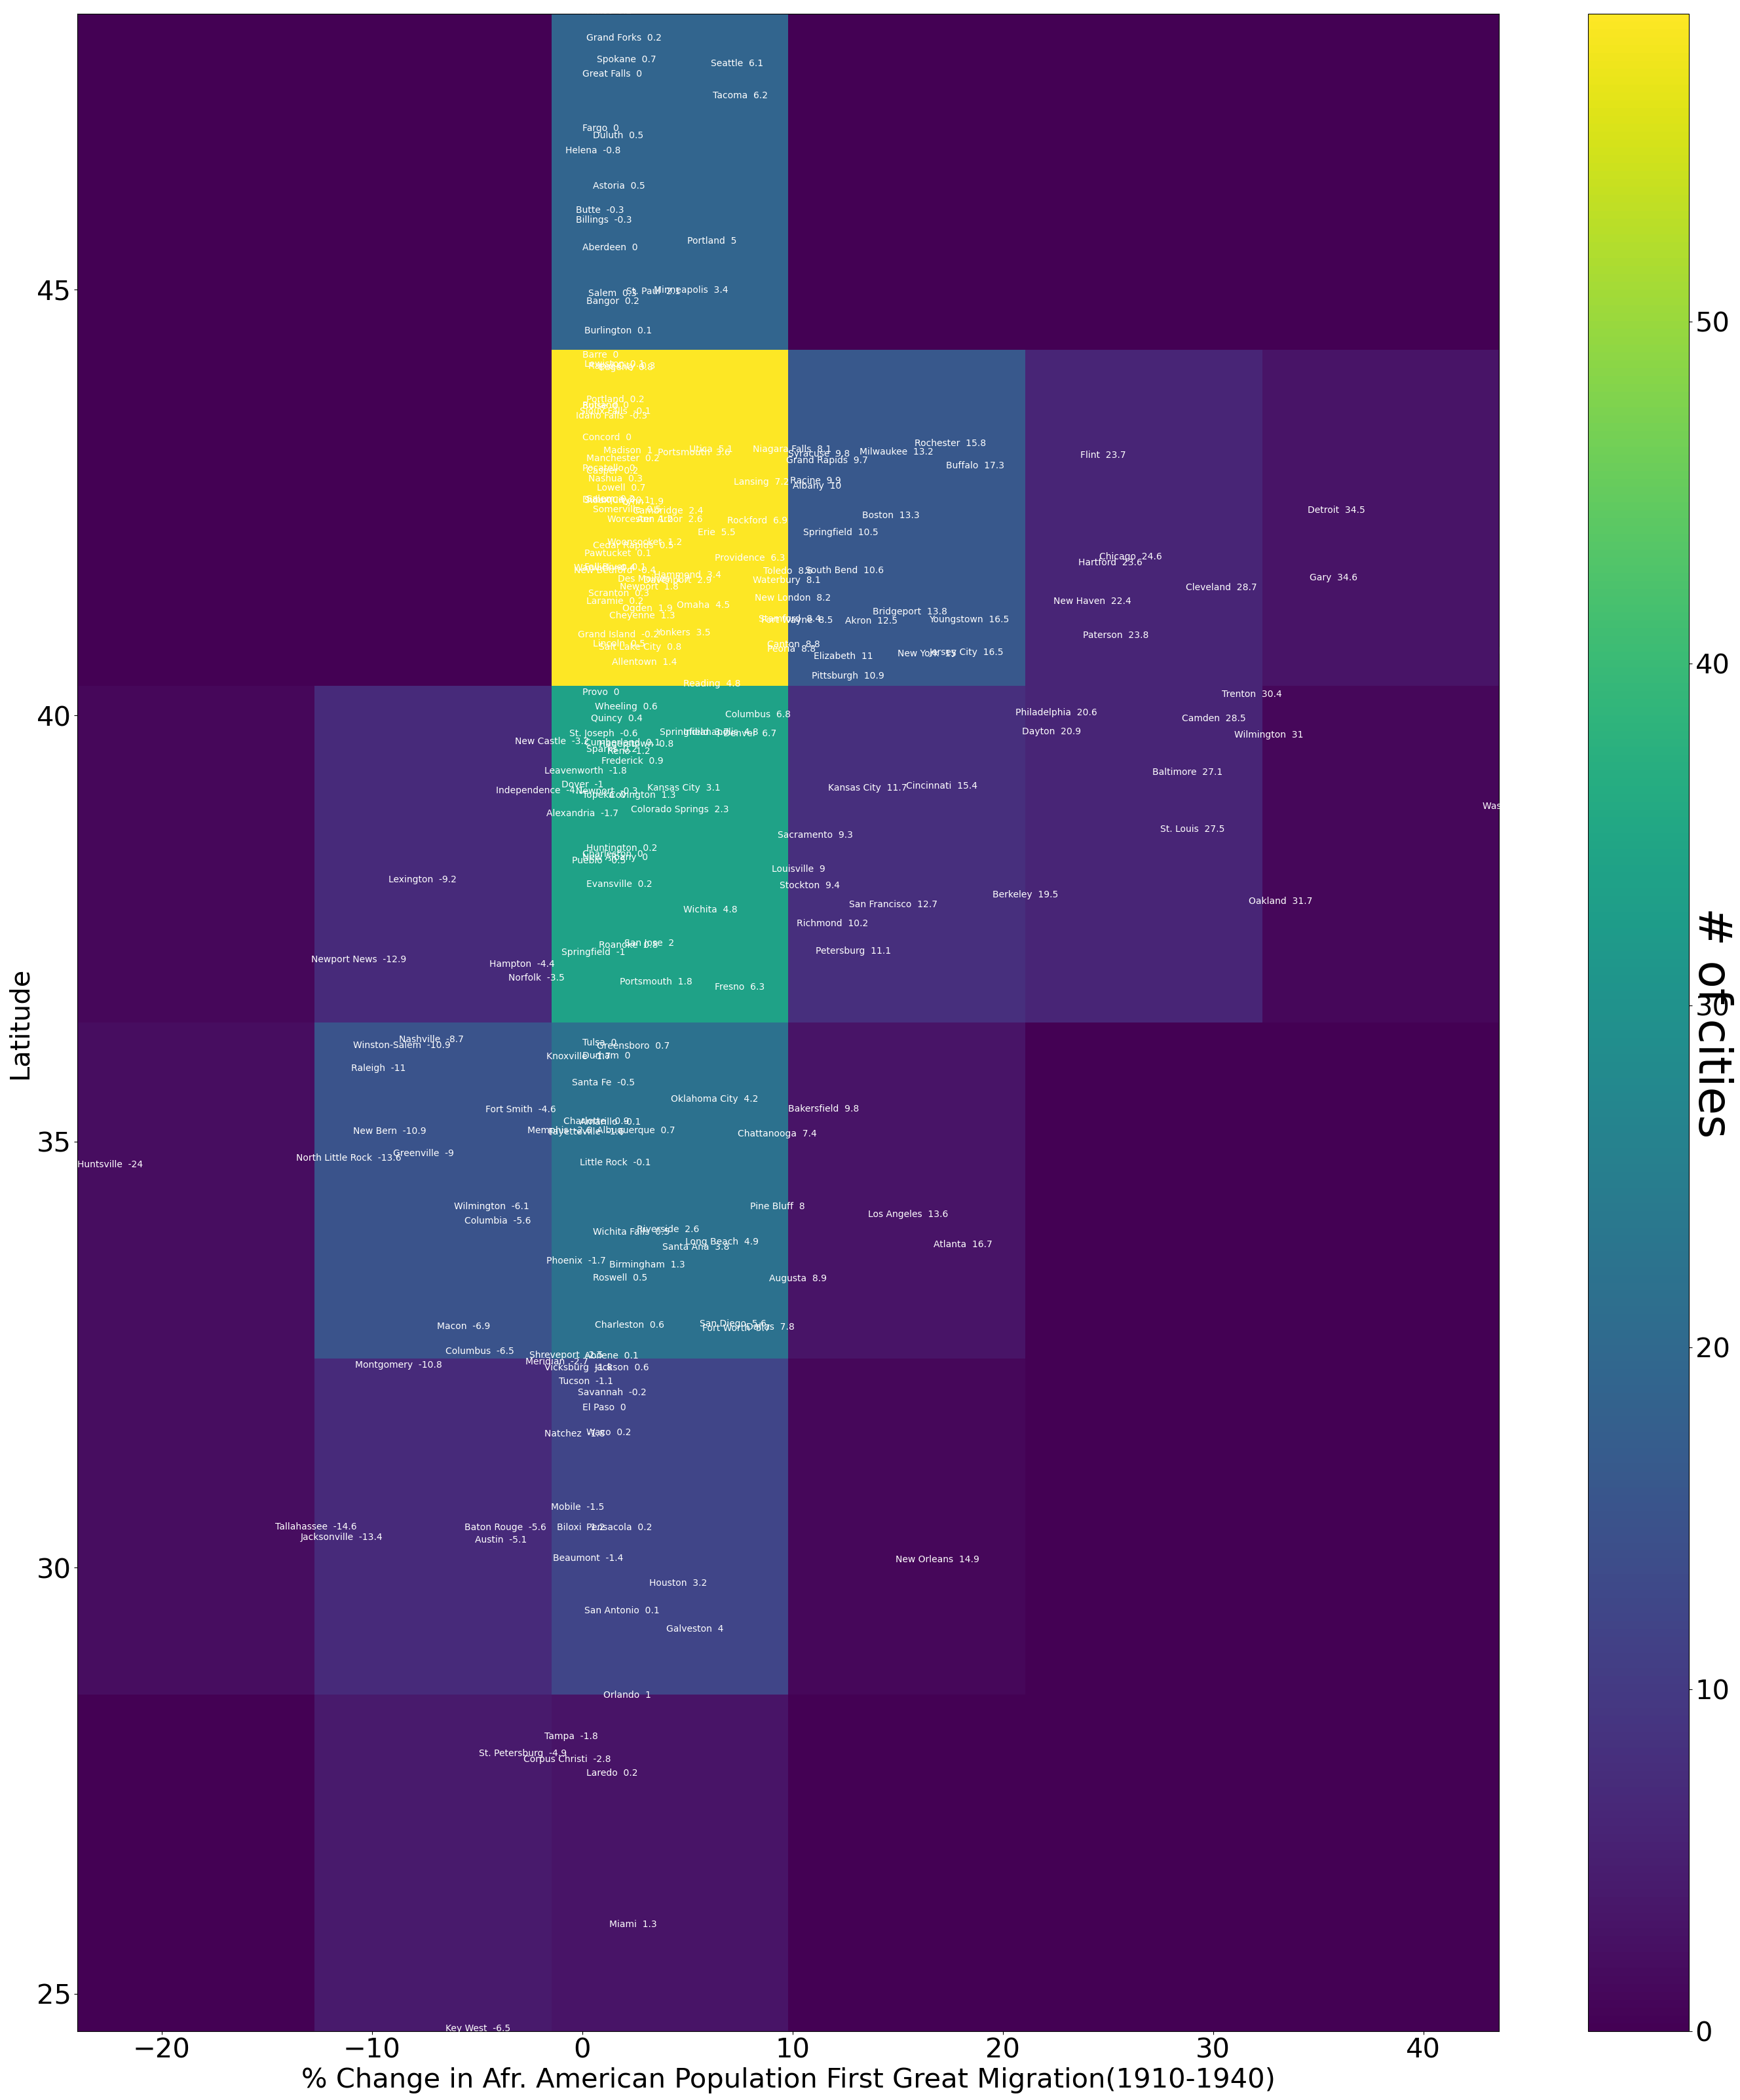

In [12]:
fig=plt.figure(figsize=(35, 40))
X=df["Mig1"].astype(float)
Y=df["lat"]
heat_map= plt.hist2d(X, Y, bins=6) #heat map is a 2dimensional histogram
plt.xlabel("% Change in Afr. American Population First Great Migration(1910-1940)",size=30)
plt.ylabel("Latitude",size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
names=df.reset_index()
for i in names.index:   ##add the names of the cities and %change in Afr. American population
    plt.text(names.Mig1[i],names.lat[i],names.city[i]+'  '+str(names.Mig1[i]),fontsize=10,color='white')
cbar = plt.colorbar()
cbar.set_label('# of cities', rotation=270,size=50)
cbar.ax.tick_params(labelsize=30)
fig.savefig("Migration1.png")

9) Improve clarity by specifying certain cities to disiplay.

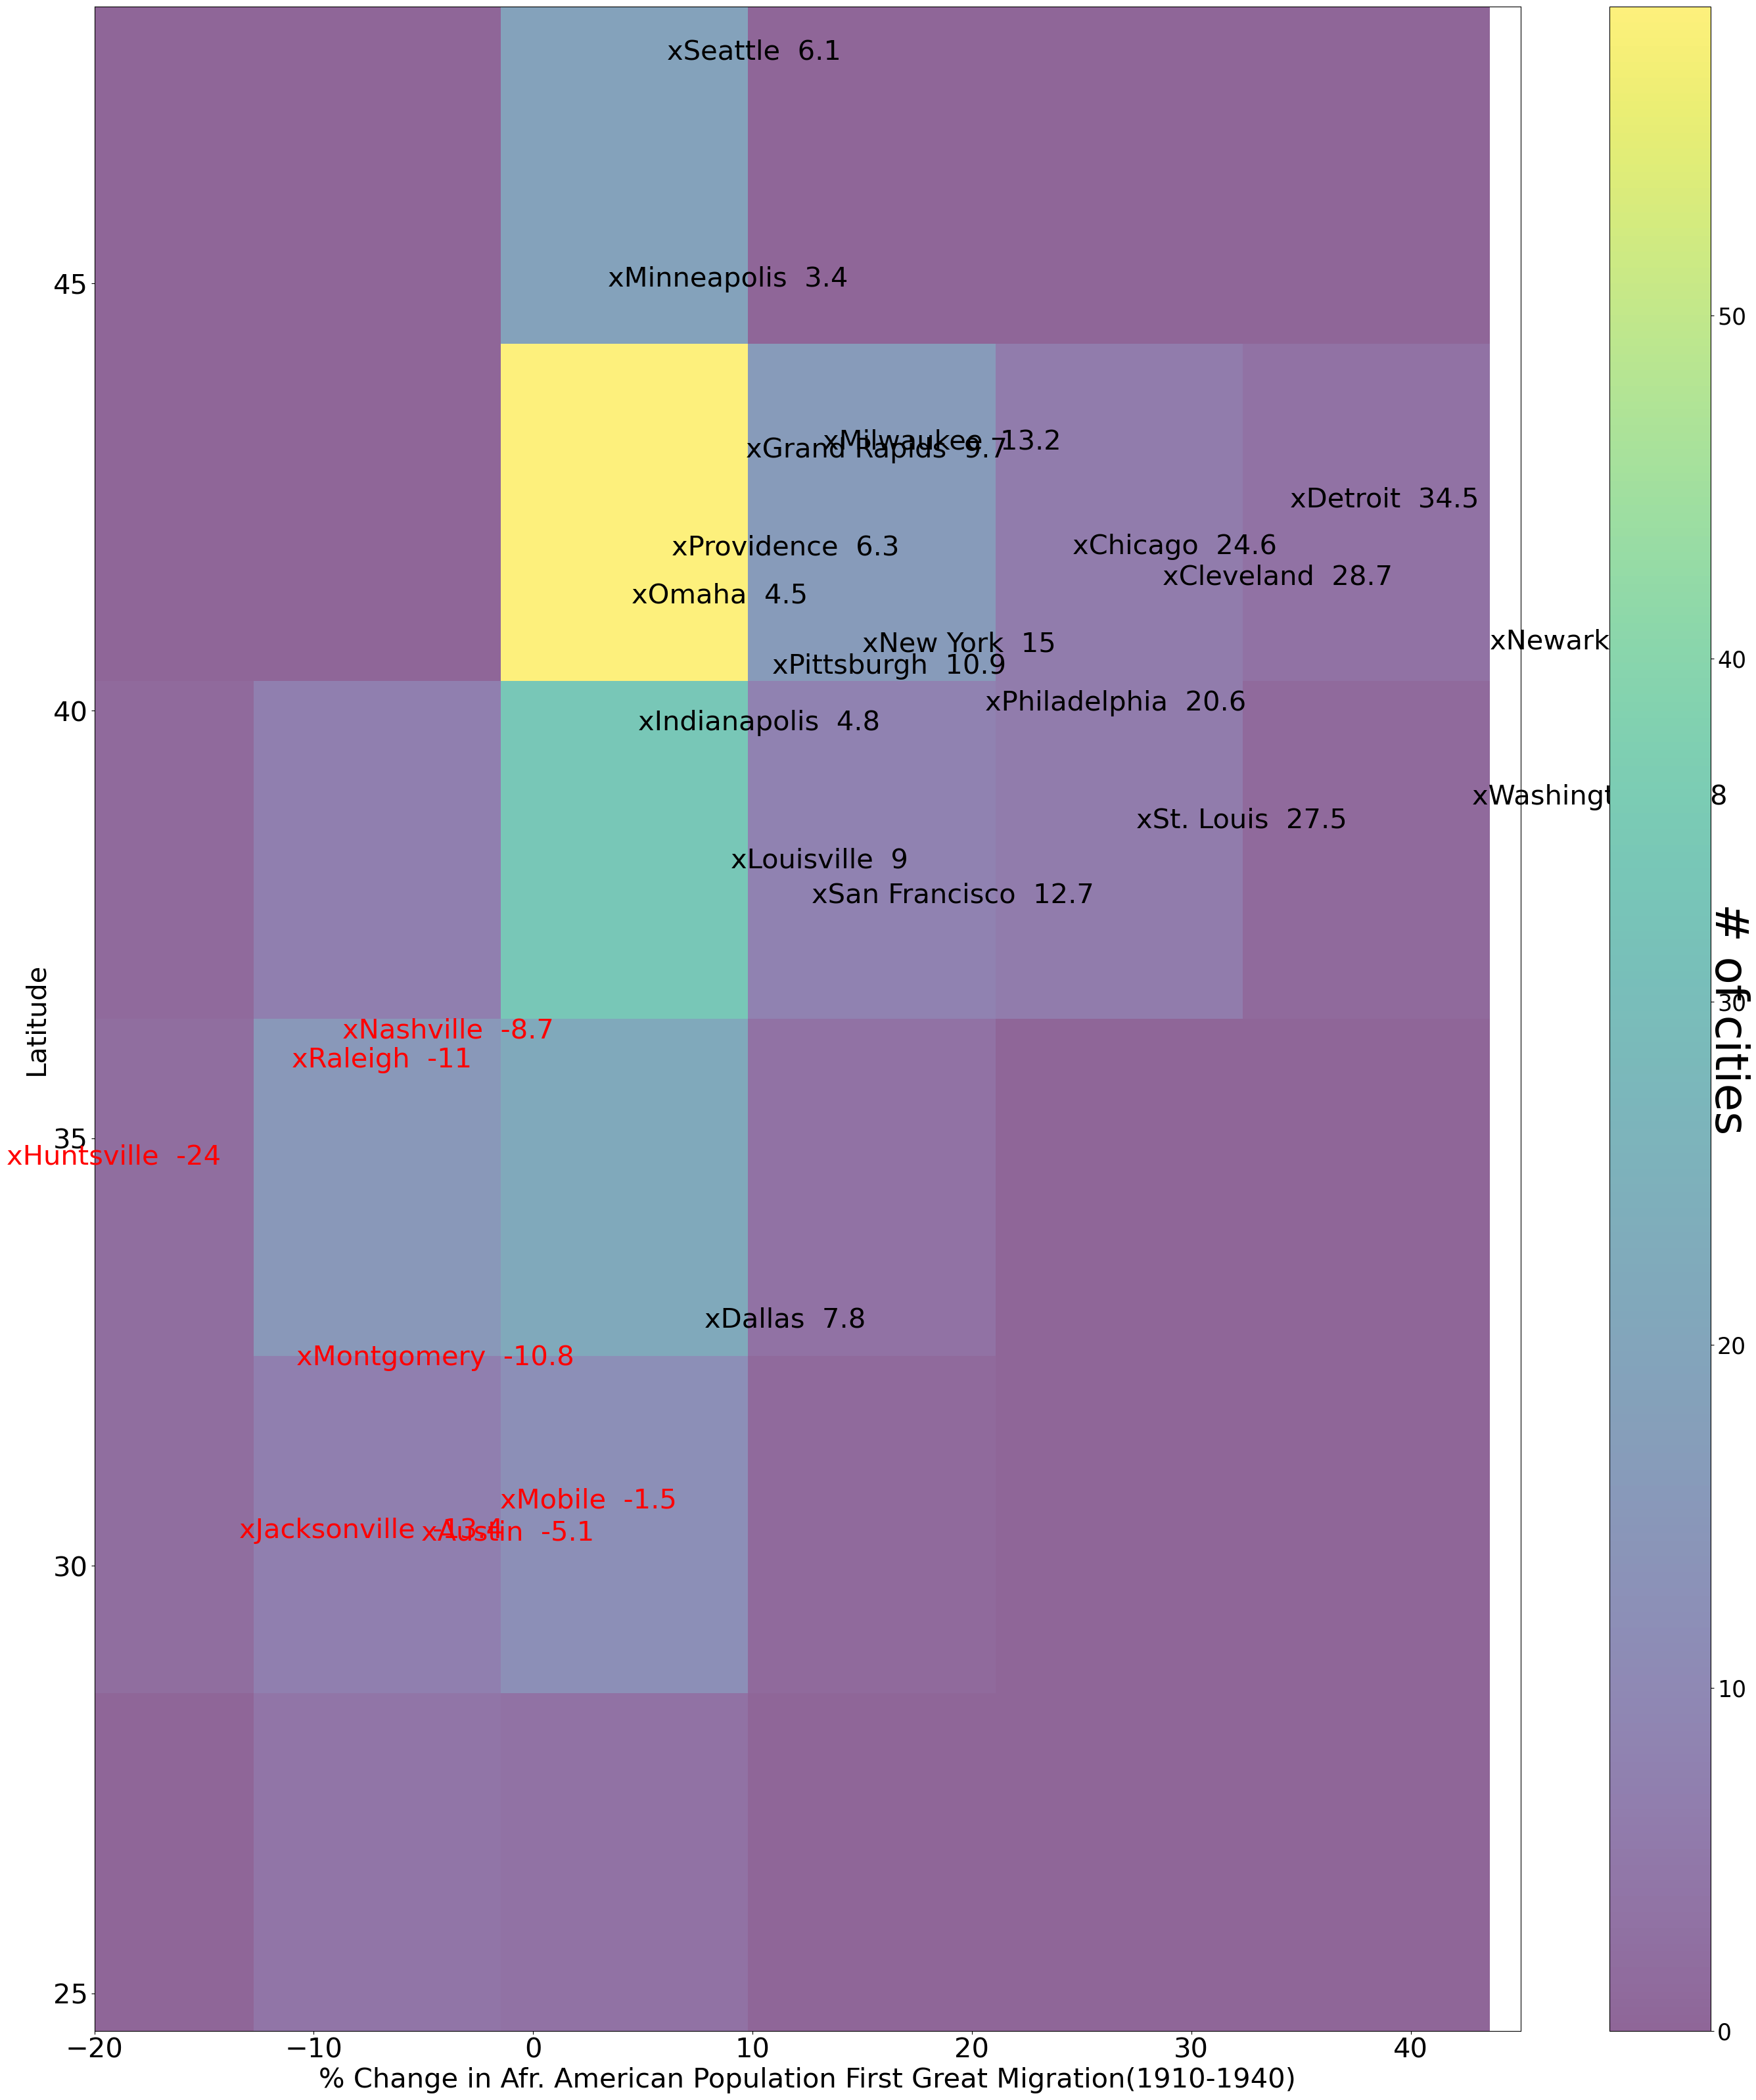

In [13]:
fig,ax=plt.subplots(figsize=(35, 40))
X=df["Mig1"].astype(float)
Y=df["lat"]
heat_map= plt.hist2d(X, Y, bins=6,alpha=.6) #heat map is a 2dimensional histogram
plt.xlabel("% Change in Afr. American Population First Great Migration(1910-1940)",size=30)
plt.ylabel("Latitude",size=30)
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.xlim(-20,45)
names=df.reset_index()
for i in names.index:   ##add the names of the cities and %change in Afr. American population
    if names.Mig1[i]<0 and any(names.loc[i,'city'] in x for x in ["Austin","Chicago","Detroit","Cleveland","Dallas","Denver","Grand Rapids","Houston","Huntsville","Indianapolis","Jacksonville","Louisville","Miami","Milwaukee","Minneapolis","Montgomery","Mobile","Nashville","New York","New Orleans","Newark","Omaha","Philadelphia","Pittsburgh","Providence","Raleigh","San Antonio","San Francisco","Seattle","St. Louis","Washington, DC",]):
        plt.text(names.Mig1[i],names.lat[i],"x"+names.city[i]+'  '+str(names.Mig1[i]),fontsize=30,color='red')
    else:
        if any(names.loc[i,'city'] in x for x in ["Chicago","Detroit","Cleveland","Dallas","Grand Rapids","Indianapolis","Louisville","Milwaukee","Minneapolis","Montgomery","Nashville","New York","Newark","Omaha","Philadelphia","Pittsburgh","Providence","Raleigh","San Francisco","Seattle","St. Louis","Washington, DC",]):
            plt.text(names.Mig1[i],names.lat[i],"x"+names.city[i]+'  '+str(names.Mig1[i]),fontsize=30,color='black')

cbar = plt.colorbar()
cbar.set_label('# of cities', rotation=270,size=50)
cbar.ax.tick_params(labelsize=25)
fig.savefig("Migration1Simplified.png")

### ASSIGNMENT

```{admonition} Assignment

Make heatmaps for Mig2 and compare it with the heatmaps for Mig1. (Eg. What happened in Chicago?)
```